### PCA of VIX Term Structure

In [2]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

path = 'DATA/' #set path for location of VIX TS

In [43]:
VIX_TS = pd.read_csv(path +'VIX_TS_CUSTOM.csv')

In [44]:
VIX_TS

,Date,VIX_1^2,VIX_2^2,VIX_3^2,VIX_6^2,VIX_9^2,VIX_12^2
0,04/01/1996,0.015131,0.014761,0.014713,0.015302,0.016779,0.017768
1,05/01/1996,0.014720,0.014526,0.014526,0.015532,0.017579,0.018092
2,08/01/1996,0.013886,0.014007,0.014085,0.015012,0.016564,0.017490
3,09/01/1996,0.020184,0.016654,0.016386,0.016412,0.017792,0.018461
4,10/01/1996,0.020782,0.018672,0.018355,0.017348,0.018660,0.019302
...,...,...,...,...,...,...,...
6830,22/02/2023,0.041063,0.040015,0.040393,0.041418,0.042734,0.042612
6831,23/02/2023,0.036753,0.036438,0.037261,0.038810,0.040634,0.040754
6832,24/02/2023,0.039237,0.038966,0.039731,0.041020,0.042417,0.042306
6833,27/02/2023,0.037837,0.036800,0.037844,0.039555,0.041173,0.041178


In [51]:
VIX_TS = pd.read_csv(path +'VIX_TS_CUSTOM.csv')
VIX_TS['Date'] = pd.to_datetime(VIX_TS['Date'],format = '%d/%m/%Y')

print('Date Range:')
print(min(VIX_TS['Date']).date(),'-', max(VIX_TS['Date']).date())

VIX_TS = VIX_TS.rename({'VIX_1^2':'1 month','VIX_2^2':'2 month','VIX_3^2':'3 month','VIX_6^2':'6 month',
               'VIX_9^2':'9 month','VIX_12^2':'12 month'},axis=1)

Date Range:
1996-01-04 - 2023-02-28


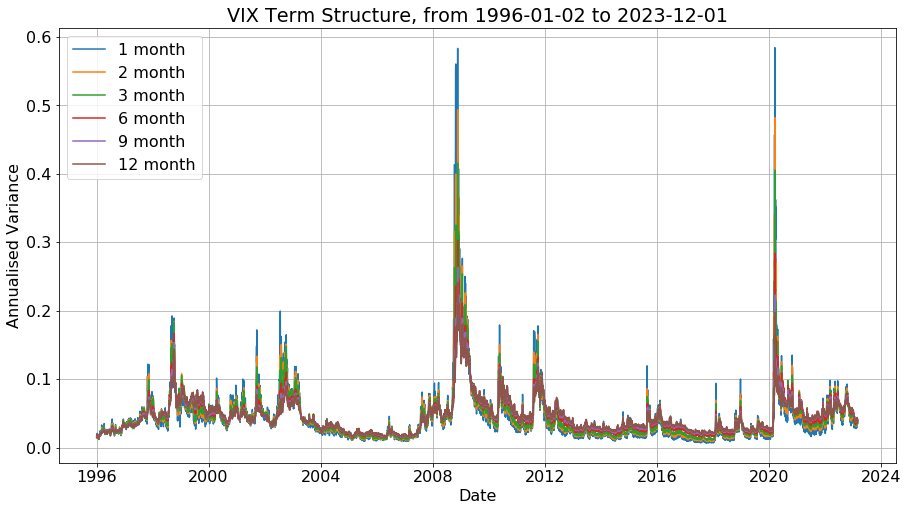

In [52]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 16})

for c_ind in range(1,7):
    LAB = VIX_TS.columns[c_ind]
    
    X = VIX_TS.loc[:,'Date']
    Y = VIX_TS.iloc[:,c_ind]
    
    plt.plot(X,Y,label = LAB)
    
    
plt.legend()
plt.ylabel('Annualised Variance')
plt.xlabel('Date')
plt.title('VIX Term Structure, from ' + str(min(DATE).date()) + ' to ' + str(max(DATE).date()))
plt.grid()
plt.show()

In [53]:
pca = PCA()

X = VIX_TS.iloc[:,1:7]
pca.fit(X)
print('Components:')
print(pca.components_)
print('')
print('Variance Proportions:')
print(pca.explained_variance_ratio_.round(3)) 

SLOPE = pca.transform(X)[:,1]

Components:
[[ 0.53632223  0.47794522  0.43366676  0.34817237  0.30616177  0.28443091]
 [ 0.590623    0.21078547 -0.01793026 -0.33777433 -0.47101191 -0.52006609]
 [ 0.56227136 -0.39365363 -0.5703049  -0.10336025  0.18462831  0.39858387]
 [-0.20089877  0.6147487  -0.22228398 -0.59879547  0.00081283  0.41684156]
 [-0.08192512  0.44069467 -0.66097825  0.53212865  0.04451822 -0.27756343]
 [ 0.01737258  0.00684912 -0.00784512 -0.33508842  0.80519725 -0.4888383 ]]

Variance Proportions:
[0.964 0.034 0.001 0.    0.    0.   ]


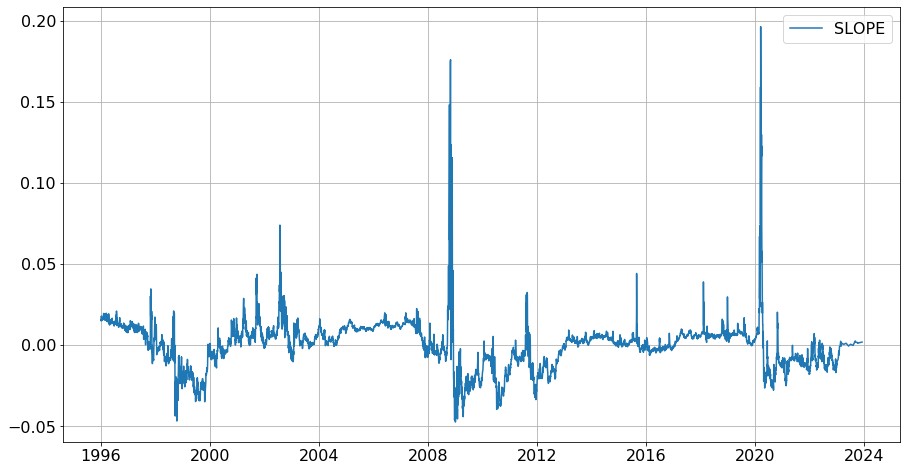

In [54]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 16})

plt.plot(DATE,SLOPE,label = 'SLOPE')

plt.grid()
plt.legend()
plt.show()